<a href="https://colab.research.google.com/github/Wdwood12/ASS_DATA2/blob/main/py_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

=== Earth Temperature Data ===
                                                Name          Disaster  \
0                     Blizzard/Floods (January 1996)      Winter Storm   
1  Pacific Northwest Severe Flooding (February 1996)          Flooding   
2       Southern Plains Drought (Spring-Summer 1996)           Drought   
3                    Hurricane Fran (September 1996)  Tropical Cyclone   
4                New England Flooding (October 1996)          Flooding   

   Begin Date  End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths  
0    19960101  19960131             6126.2           3003.0     187  
1    19960207  19960212             2056.9           1008.3       9  
2    19960301  19960831             3654.5           1791.5       0  
3    19960905  19960908            10014.0           5007.0      37  
4    19961019  19961022             1352.0            676.0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):


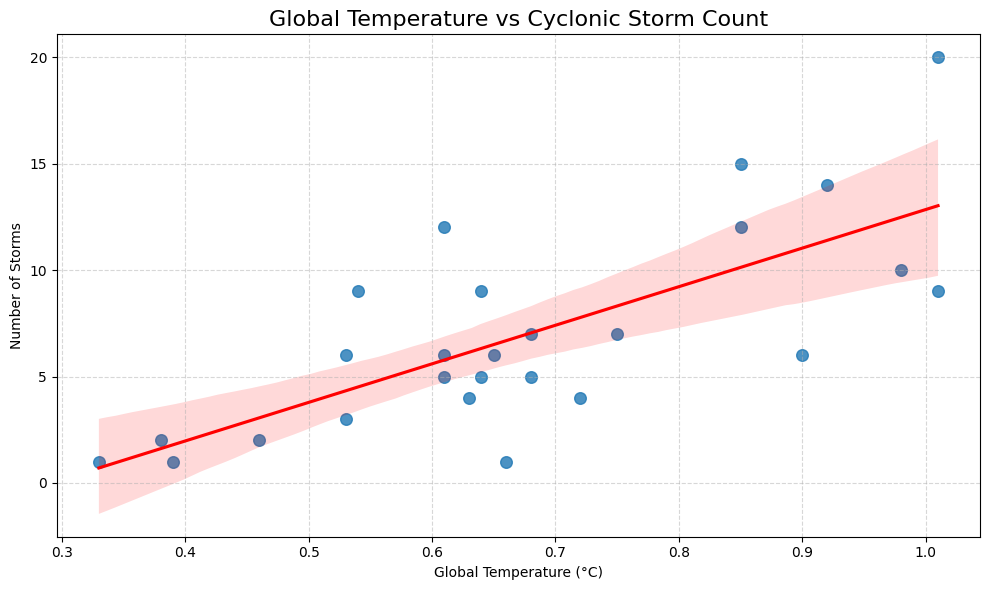

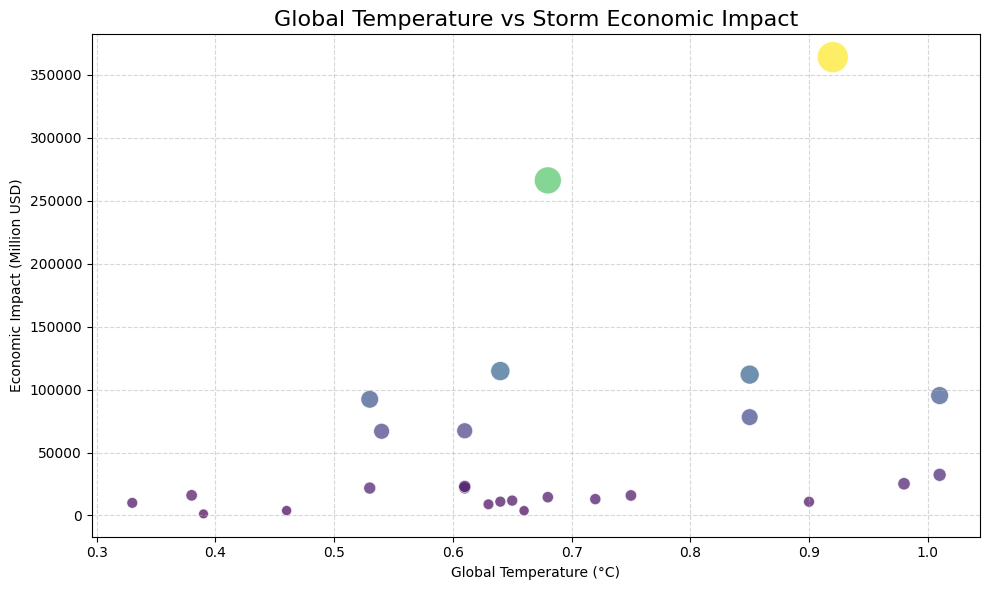

                          Storm Count  Total Cost (Million USD)  \
Storm Count                  1.000000                  0.487080   
Total Cost (Million USD)     0.487080                  1.000000   
Global Temp (°C)             0.729223                  0.322975   

                          Global Temp (°C)  
Storm Count                       0.729223  
Total Cost (Million USD)          0.322975  
Global Temp (°C)                  1.000000  


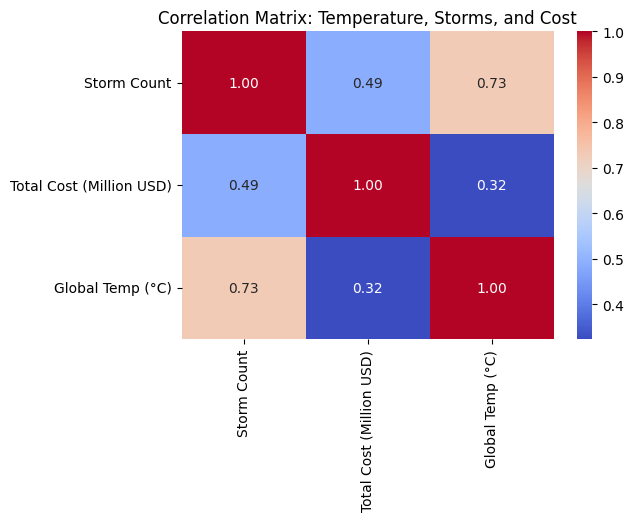

Clean merged dataset exported successfully.


'\n- NASA Goddard Institute for Space Studies. (2024). *Global Surface Temperature Data (GLB.Ts dataset).* NASA. https://data.giss.nasa.gov/gistemp/  \n- National Oceanic and Atmospheric Administration (NOAA). (2024). *Billion-Dollar Weather and Climate Disasters Dataset.* NOAA NCEI. https://www.ncei.noaa.gov/access/billions/  \n- National Centers for Environmental Information. (2023). *Global Historical Climatology Network (GHCN) Daily Summaries.* NOAA. https://www.ncei.noaa.gov/  \n- Downey, A. B. (2015). *Think Python: How to Think Like a Computer Scientist* (2nd ed.). Green Tea Press.\n'

In [18]:

# Pandas Data Analysis
# Exploring the Relationships bet Global Temperature
# Woodelyne Durosier

"""
# Introduction
  Natural catastrophes are becoming more frequent and intense due to the ongoing effects of climate change on global weather patterns.
- This research investigates the connection between cyclonic storm frequency, cost, and mortality (hurricanes, tornadoes, and severe storms) and Earth's surface temperature.
"""

"""
# Data Sources:
- NOAA – Earth_Temp.csv (natural disaster database)
- NASA GISS – Glb_Ts.csv (global temperature anomalies)

Tools: Matplotlib and Seaborn for visualization, Pandas for data analysis and cleaning.
#his investigation aims to show how relationships between environmental and climatic variables may be found through data manipulation and visualization.  This investigation aims to show how data manipulation and visualization may uncover relationships between environmental and climatic variables, eventually offering policymakers insightful information.
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Earth_Temp dataset
earth_temp = pd.read_csv("Earth_Temp.csv", skiprows=2)
Glb_Ts = pd.read_csv("Glb_Ts.csv", skiprows=1)

# Exploring Data
print("=== Earth Temperature Data ===")
print(earth_temp.head())
print(earth_temp.info())

# Convert Table

earth_temp['Begin Date'] = pd.to_datetime(earth_temp['Begin Date'], format='%Y%m%d', errors='coerce')
earth_temp['End Date'] = pd.to_datetime(earth_temp['End Date'], format='%Y%m%d', errors='coerce')
earth_temp['Year'] = earth_temp['Begin Date'].dt.year

print(earth_temp.describe())
print("Missing values:\n", earth_temp.isnull().sum())


# Filter Cyclone Events and Summarize
storms = earth_temp[earth_temp['Disaster'].isin([
    'Hurricane', 'Tropical Cyclone', 'Tornado', 'Severe Storm'
])].copy()

print("Storm Types:\n", storms['Disaster'].value_counts())

storm_summary = storms.groupby('Year', as_index=False).agg({
    'Name': 'count',
    'CPI-Adjusted Cost': 'sum',
    'Deaths': 'sum'
}).rename(columns={
    'Name': 'Storm Count',
    'CPI-Adjusted Cost': 'Total Cost (Million USD)',
    'Deaths': 'Total Deaths'
})

storm_summary.head()

# Clean Temperature Data
Glb_Ts_clean = Glb_Ts[['Year', 'J-D']].copy()
Glb_Ts_clean.rename(columns={'J-D': 'Global Temp (°C)'}, inplace=True)
Glb_Ts_clean['Year'] = pd.to_numeric(Glb_Ts_clean['Year'], errors='coerce')
Glb_Ts_clean['Global Temp (°C)'] = pd.to_numeric(Glb_Ts_clean['Global Temp (°C)'], errors='coerce')
Glb_Ts_clean.head()

# Merge Temperature and Storm Data
combined = pd.merge(storm_summary, Glb_Ts_clean, on='Year', how='inner')
print(combined.head())
print(combined.describe())

# Visualization A – Global Temp vs Storm Count
plt.figure(figsize=(10,6))
sns.regplot(
    x='Global Temp (°C)', y='Storm Count', data=combined,
    scatter_kws={'s':70}, line_kws={'color':'red'}
)
plt.title("Global Temperature vs Cyclonic Storm Count", fontsize=16)
plt.xlabel("Global Temperature (°C)")
plt.ylabel("Number of Storms")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Visualization B – Global Temp vs Economic Impact
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Global Temp (°C)',
    y='Total Cost (Million USD)',
    size='Total Cost (Million USD)',
    hue='Total Cost (Million USD)',
    palette='viridis',
    sizes=(50, 500),
    alpha=0.7,
    data=combined,
    legend=False
)
plt.title("Global Temperature vs Storm Economic Impact", fontsize=16)
plt.xlabel("Global Temperature (°C)")
plt.ylabel("Economic Impact (Million USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Slide3_StormImpact.png", dpi=300)
plt.show()

# Correlation Analysis
corr = combined[['Storm Count', 'Total Cost (Million USD)', 'Global Temp (°C)']].corr()
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Temperature, Storms, and Cost")
plt.show()

# Results:
"""
The frequency of storms rises with rising global temperatures.

Temperature anomalies result in a large increase in economic expenses.

A positive correlation between warming and storm activity is confirmed by correlation analysis.

Restrictions

Early years records that are missing or inconsistent.

Inflation-adjustment assumptions are the basis for cost data.

Correlation ≠ causality; other climate factors might improve precision.

Upcoming Projects:

Comparing regions (Pacific vs. Atlantic).

Storm intensity categories are integrated.

A predictive model that incorporates several climatic factors.
"""

#Cleaned Dataset

combined.to_csv("Combined_Storm_Temperature.csv", index=False)
print("Clean merged dataset exported successfully.")

# References (APA Style)
"""
- NASA Goddard Institute for Space Studies. (2024). *Global Surface Temperature Data (GLB.Ts dataset).* NASA. https://data.giss.nasa.gov/gistemp/
- National Oceanic and Atmospheric Administration (NOAA). (2024). *Billion-Dollar Weather and Climate Disasters Dataset.* NOAA NCEI. https://www.ncei.noaa.gov/access/billions/
- National Centers for Environmental Information. (2023). *Global Historical Climatology Network (GHCN) Daily Summaries.* NOAA. https://www.ncei.noaa.gov/
- Downey, A. B. (2015). *Think Python: How to Think Like a Computer Scientist* (2nd ed.). Green Tea Press.
"""











